## Importing libraries for dats analysis

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

## Use Pandas Web Datareader to download the stocks prices for large Alberta oil producers from Yahoo Finance

In [13]:
start = datetime.datetime(2011, 3, 1)
end = datetime.datetime(2021, 3, 1)

Suncor = web.DataReader("SU", 'yahoo', start, end)
CNRL = web.DataReader("CNQ", 'yahoo', start, end)
Cenovus = web.DataReader("CVE", 'yahoo', start, end)
CrescentPoint = web.DataReader("CPG", 'yahoo', start, end)
Imperial = web.DataReader("IMO", 'yahoo', start, end)

## Take a look at recent stock prices for Suncor and CNRL. Make sure the data sets have been downloaded properly.

In [14]:
Suncor.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,21.139999,19.840000,20.820000,20.930000,12928200.0,20.761913
2021-02-24,21.860001,20.790001,21.150000,21.530001,11814200.0,21.357094
2021-02-25,21.770000,20.629999,21.750000,20.650000,11358800.0,20.484161
2021-02-26,20.320000,19.520000,20.230000,19.860001,10115700.0,19.700506
2021-03-01,20.700001,20.010000,20.469999,20.240000,10492200.0,20.077454


In [15]:
CNRL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-23,28.990000,27.690001,28.910000,28.900000,3427800.0,28.900000
2021-02-24,30.139999,28.299999,29.000000,29.139999,5032200.0,29.139999
2021-02-25,29.530001,28.070000,29.320000,28.080000,3837500.0,28.080000
2021-02-26,28.049999,27.010000,27.700001,27.290001,3732600.0,27.290001
2021-03-01,28.610001,27.709999,27.860001,28.530001,3819000.0,28.530001


## Concatinate all datasets into a single dataset 'cop' ('canadian oil producers) and check the head of the dataset

In [16]:
#stocks list for combined dataset
stocks = ["SU", "CNQ", "CVE", "CPG", "IMO"]
#concatinating data into Canadian Oil Producers
cop = pd.concat([Suncor, CNRL, Cenovus, CrescentPoint, Imperial], axis=1, keys=stocks)
cop.head()

SU                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2011-03-01  47.419998  46.889999  47.139999  46.900002   9612400.0  35.575493   
2011-03-02  47.560001  46.849998  47.340000  47.310001   9018400.0  35.963955   
2011-03-03  47.200001  46.480000  47.040001  46.740002  10122200.0  35.530643   
2011-03-04  47.750000  46.930000  47.220001  47.730000   8040600.0  36.283211   
2011-03-07  48.529999  46.639999  48.169998  46.869999   8888600.0  35.629478   

                  CNQ                                   ...        CPG  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2011-03-01  50.480000  49.930000  50.360001  50.189999  ...  49.099998   
2011-03-02  51.700001  50.099998  50.320000  51.209999  ...  49.340000   
2011-03-03  50.369999  48.919998  50.230000  49.400002  ...  48.709999   
2011-03-04  51.169998  49.619999  49.880001  51.119999  ...  48.730000   
2011-03-07  52.040001  49.439999  50.790001  49.480000  ...  49.820000   

                                                 IMO                        \
                Close   Volume  Adj Close       High        Low       Open   
Date                                                                         
2011-03-01  49.299999  18000.0  37.048935  52.820000  51.540001  51.959999   
2011-03-02  48.860001  21500.0  36.718292  53.189999  51.950001  52.180000   
2011-03-03  48.340000  30100.0  36.327492  53.560001  52.570000  53.009998   
2011-03-04  49.459999  33200.0  37.169174  54.000000  52.639999  52.740002   
2011-03-07  49.080002  16900.0  36.883625  55.630001  53.689999  54.389999   

                                             
                Close     Volume  Adj Close  
Date                                         
2011-03-01  51.779999   810000.0  44.031666  
2011-03-02  53.169998   471600.0  45.213673  
2011-03-03  52.849998   576800.0  44.941555  
2011-03-04  54.000000   428500.0  45.919472  
2011-03-07  53.730000  1704500.0  45.689873  

[5 rows x 30 columns]

## Provide the column names 'Entity' and 'Stock' for empty lists and make sure change is applied

In [17]:
cop.columns.names

FrozenList([None, None])

In [18]:
cop.columns.names = ['Entity','Stock']
cop.head() 

Entity             SU                                                          \
Stock            High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2011-03-01  47.419998  46.889999  47.139999  46.900002   9612400.0  35.575493   
2011-03-02  47.560001  46.849998  47.340000  47.310001   9018400.0  35.963955   
2011-03-03  47.200001  46.480000  47.040001  46.740002  10122200.0  35.530643   
2011-03-04  47.750000  46.930000  47.220001  47.730000   8040600.0  36.283211   
2011-03-07  48.529999  46.639999  48.169998  46.869999   8888600.0  35.629478   

Entity            CNQ                                   ...        CPG  \
Stock            High        Low       Open      Close  ...       Open   
Date                                                    ...              
2011-03-01  50.480000  49.930000  50.360001  50.189999  ...  49.099998   
2011-03-02  51.700001  50.099998  50.320000  51.209999  ...  49.340000   
2011-03-03  50.369999  48.919998  50.230000  49.400002  ...  48.709999   
2011-03-04  51.169998  49.619999  49.880001  51.119999  ...  48.730000   
2011-03-07  52.040001  49.439999  50.790001  49.480000  ...  49.820000   

Entity                                           IMO                        \
Stock           Close   Volume  Adj Close       High        Low       Open   
Date                                                                         
2011-03-01  49.299999  18000.0  37.048935  52.820000  51.540001  51.959999   
2011-03-02  48.860001  21500.0  36.718292  53.189999  51.950001  52.180000   
2011-03-03  48.340000  30100.0  36.327492  53.560001  52.570000  53.009998   
2011-03-04  49.459999  33200.0  37.169174  54.000000  52.639999  52.740002   
2011-03-07  49.080002  16900.0  36.883625  55.630001  53.689999  54.389999   

Entity                                       
Stock           Close     Volume  Adj Close  
Date                                         
2011-03-01  51.779999   810000.0  44.031666  
2011-03-02  53.169998   471600.0  45.213673  
2011-03-03  52.849998   576800.0  44.941555  
2011-03-04  54.000000   428500.0  45.919472  
2011-03-07  53.730000  1704500.0  45.689873  

[5 rows x 30 columns]

## I want to check the min and max of adjusted closing stock prices for given period. This is a finally adjusted price the stocks were traded by the end of the day.

In [19]:
max_stock = cop.xs(key='Adj Close',axis=1,level='Stock').max()
max_stock

Entity
SU     38.311535
CNQ    38.190075
CVE    32.265911
CPG    37.424694
IMO    47.569206
dtype: float64

In [ ]:
## The highest stock price for the last 10 year period are Suncor and Imperial.
## Both are US companies. Suncor is a largest gainer out of big Canadian majors. 

In [20]:
min_stock = cop.xs(key='Close',axis=1,level='Stock').min()
min_stock

Entity
SU     10.45
CNQ     7.74
CVE     1.60
CPG     0.61
IMO     7.83
dtype: float64

In [ ]:
## Crescent Point Energy and Cenovus were hit the most - more then 10 times drop. CNRL and Cenovus recently made significant acquisitions. 

## Let's visualise the information about min and max prices using bar plots.  

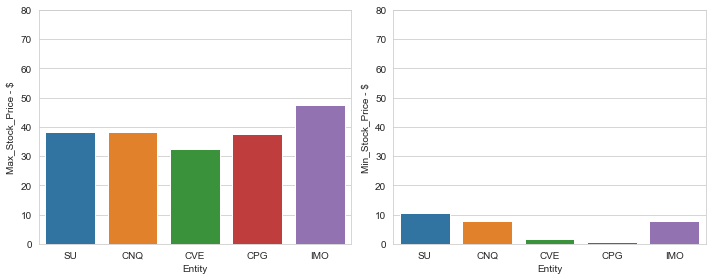

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
sns.barplot(max_stock.index, max_stock.values, ax=axes[0])
axes[0].set_ylim(0,80)
axes[0].set_ylabel('Max_Stock_Price - $')

sns.barplot(min_stock.index, min_stock.values, ax=axes[1])
axes[1].set_ylim(0,80)
axes[1].set_ylabel('Min_Stock_Price - $')
plt.tight_layout()

## Let put all the companies together one one plot to visualize stock prices with time.

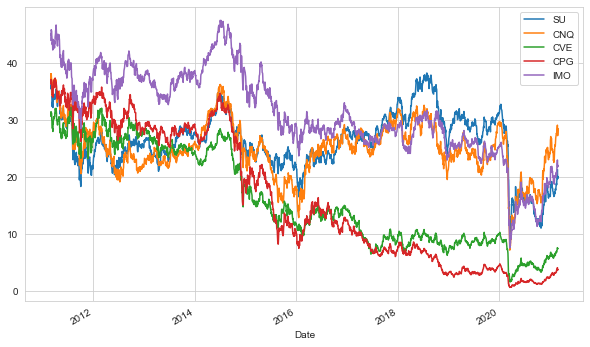

In [22]:
for stock in stocks:
    cop[stock]['Adj Close'].plot(figsize=(10,6),label=stock)
plt.legend()

## Visualizing stock prices vs. time using interactive data plotting(iplot). The significant price drop occured between mid 2014 and end of 2016. It directly correlates with overall oil price drop started in 2014. 

In [23]:
cop.xs(key='Adj Close',axis=1,level='Stock').iplot()

## We want to calculate Return - the expected value, of the probability distribution of investment returns

In [24]:
returns = pd.DataFrame()
for stock in stocks:
    returns[stock+' Return'] = cop[stock]['Adj Close'].pct_change()
returns.head()

,SU Return,CNQ Return,CVE Return,CPG Return,IMO Return
Date,,,,,
2011-03-01,NaN,NaN,NaN,NaN,NaN
2011-03-02,0.010919,0.020323,0.026105,-0.008924,0.026844
2011-03-03,-0.012048,-0.035345,-0.009572,-0.010643,-0.006018
2011-03-04,0.021181,0.034818,0.006613,0.023169,0.021760
2011-03-07,-0.018017,-0.032081,-0.005306,-0.007682,-0.005000


In [ ]:
## Let's visualize our returns using pair plot

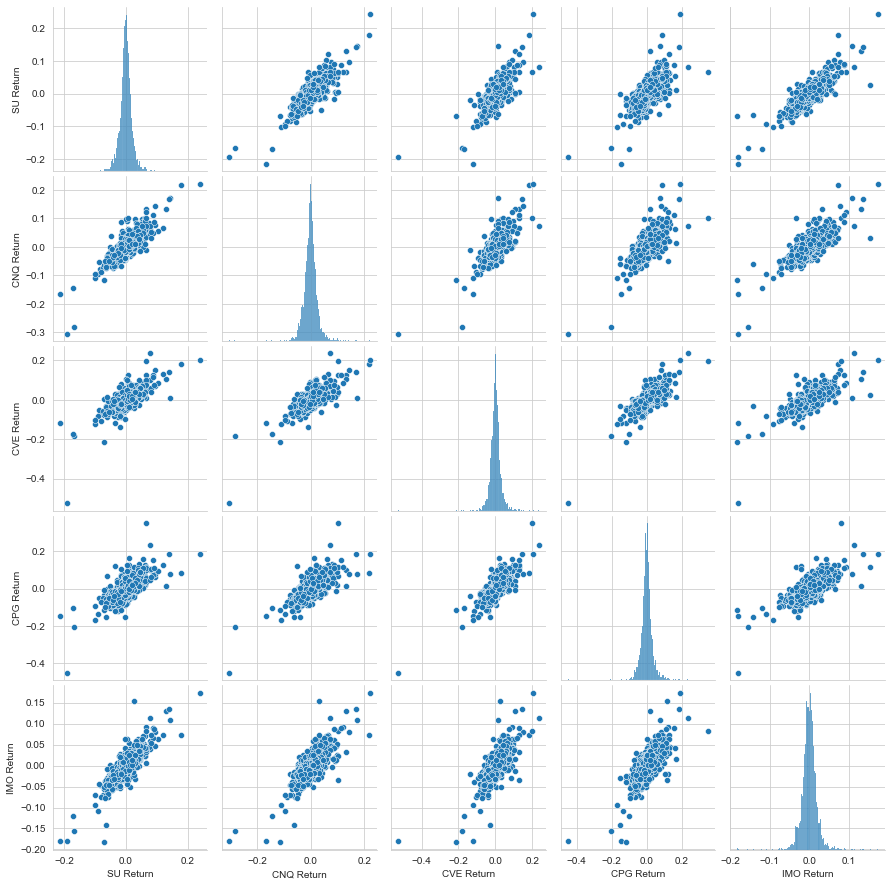

In [25]:
import seaborn as sns
sns.pairplot(returns[1:]) # avoiding NaN row

## I would like to look at best gain day and worst drop day using idxmax and idxmin.

In [26]:
print(returns.idxmax(), returns.idxmin())

SU Return    2020-11-09
CNQ Return   2020-11-09
CVE Return   2020-04-02
CPG Return   2020-05-18
IMO Return   2020-11-09
dtype: datetime64[ns] SU Return    2020-03-12
CNQ Return   2020-03-09
CVE Return   2020-03-09
CPG Return   2020-03-09
IMO Return   2020-03-17
dtype: datetime64[ns]


## I want to look at standard deviation to identify the riskiest stock in 2014

In [28]:
returns.loc['2014-01-01':'2014-12-31'].std() 
#Imperial had the lowest return in 2014

SU Return     0.017032
CNQ Return    0.017861
CVE Return    0.018341
CPG Return    0.020874
IMO Return    0.014422
dtype: float64

## What is the riskiest stock in 2020? 

In [29]:
returns.loc['2020-01-01':'2020-12-31'].std() 
## It is still Imperial

SU Return     0.046937
CNQ Return    0.051858
CVE Return    0.064427
CPG Return    0.067765
IMO Return    0.044142
dtype: float64

## Create distribution plots to show return on stocks in 2020. 

<AxesSubplot:xlabel='CVE Return', ylabel='Density'>

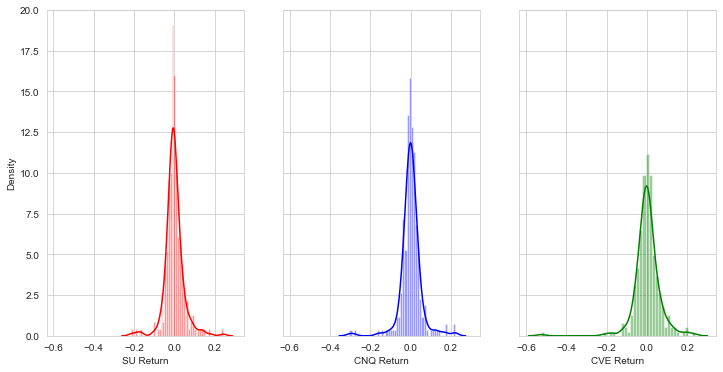

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.loc['2020-01-01':'2020-12-31']['SU Return'],
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CNQ Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CVE Return'], 
             color='green', bins=50, ax=axes[2])


<AxesSubplot:xlabel='CVE Return', ylabel='Density'>

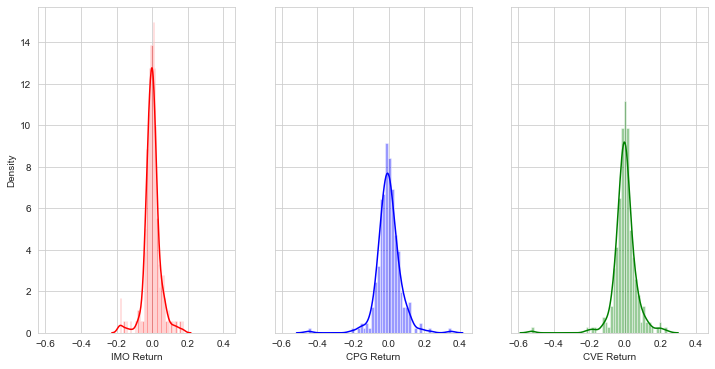

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 6), sharex=True, sharey=True)

sns.distplot(returns.loc['2020-01-01':'2020-12-31']['IMO Return'], 
             color='red', bins=50, ax=axes[0])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CPG Return'], 
             color='blue', bins=50, ax=axes[1])
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['CVE Return'], 
             color='green', bins=50, ax=axes[2])

## The other way to look at stock price correlation is to create a heatmap. 

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

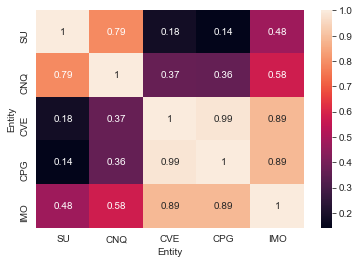

In [32]:
sns.heatmap(cop.xs(key='Adj Close',axis=1,level='Stock').corr(),annot=True)

## Let's look at moving average for CPG and CVE - the lowest stock prices as of 2020.

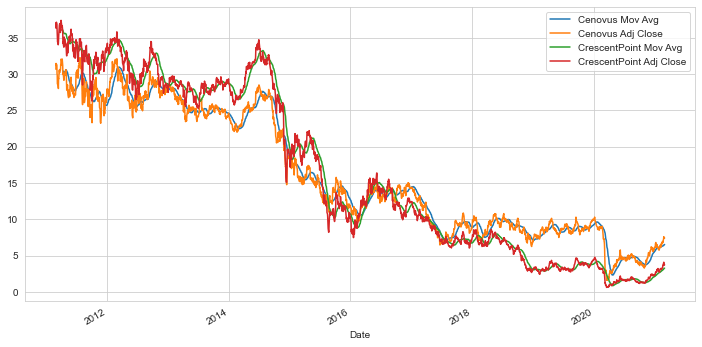

In [60]:
plt.figure(figsize=(12,6))
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
    label='Cenovus Mov Avg')
Cenovus['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
    label='Cenovus Adj Close')
CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].rolling(window=30).mean().plot(
    label='CrescentPoint Mov Avg')
CrescentPoint['Adj Close'].loc['2011-01-01':'2021-03-01'].plot(
    label='CrescentPoint Adj Close')

plt.legend()

## Create a candle plot for Cenovus and Crescent Point stocks at year 2020. This financial chart takes a dataset that contains open, high, low and close values for specific time period 

In [59]:
Cenovus[['Open', 'High', 'Low', 'Close']].loc['2019-12-31':'2021-01-01'].iplot(kind='candle')
CrescentPoint[['Open', 'High', 'Low', 'Close']].loc['2019-12-31':'2021-01-01'].iplot(kind='candle')

## Create a Simple Moving Averages (SMA) plot of Cenovus for the year 2020, passing three periods[10,30,50]

In [47]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(
    study='sma',periods=[10,30,50],title='Simple Moving Averages')

## Look at Bollinger statistical chart characterizing the stock prices and volatility over time for Cenovus year 2020

In [49]:
Cenovus['Adj Close'].loc['2020-01-01':'2020-12-31'].ta_plot(study='boll')

## Let's call for closing stock price for all the companies once again

In [50]:
cop = web.DataReader(stocks,'yahoo',start=start,end=end)['Adj Close']
cop.head()

Symbols,SU,CNQ,CVE,CPG,IMO
Date,,,,,
2011-03-01,35.575493,37.429398,30.683428,37.048935,44.031666
2011-03-02,35.963955,38.190075,31.484413,36.718292,45.213673
2011-03-03,35.530643,36.840260,31.183054,36.327492,44.941555
2011-03-04,36.283211,38.122952,31.389257,37.169174,45.919472
2011-03-07,35.629478,36.899914,31.222706,36.883625,45.689873


## How do the returns corelate for competitors - Cenovus and Crescent Point?

In [51]:
cop_comp = cop.pct_change()

corr = cop_comp.corr()

Text(0, 0.5, 'Returns CPG')

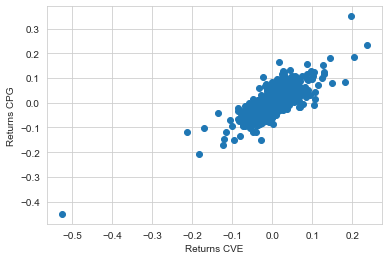

In [52]:
plt.scatter(cop_comp.CVE,cop_comp.CPG)
plt.xlabel('Returns CVE')
plt.ylabel('Returns CPG')
## We can see some positive correlations - the higher CVE, the higher CPG

## Another way to look at the returns for CVE and CPG

Text(0, 0.5, 'Encana Returns')

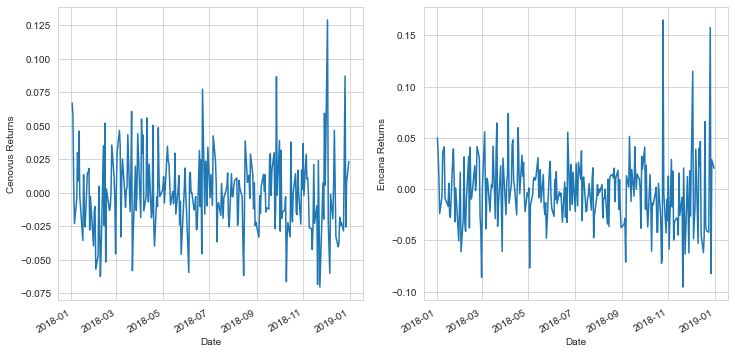

In [54]:
CVE_ret = Cenovus['Adj Close'] / Cenovus['Adj Close'].shift(1) - 1
CPG_ret = CrescentPoint['Adj Close'] / CrescentPoint['Adj Close'].shift(1) - 1


fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

CVE_ret.loc['2018-01-01':'2018-12-31'].plot(figsize=(12,6), label='return', ax=axes[0])
axes[0].set_ylabel('Cenovus Returns')
CPG_ret.loc['2018-01-01':'2018-12-31'].plot(figsize=(12,6), label='return', ax=axes[1])
axes[1].set_ylabel('Encana Returns')
#plt.tight_layout()

## At the end I would like to look at the stocks with higher risk

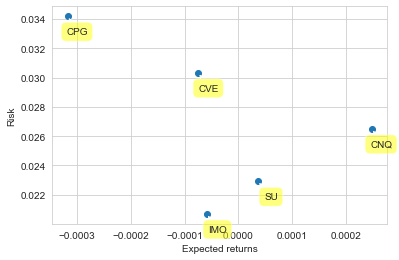

In [55]:
plt.scatter(cop_comp.mean(), cop_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(cop_comp.columns, cop_comp.mean(), cop_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [56]:
#Looks like larger Canadian oil majors have a stocks with lower risks